In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [79]:
# survival = Survival(0=NO;1=Yes)
# class = passenger class(1=1st,2=2nd,3=3rd)
# name = Name
# sex = sex
# age = age
# sibsp = siblings/spouses aboard
# parch = number of parents/children aboard 
# ticket = ticket number 
# fare = passenger fare
# cabin = cabin 
# embarked = port of embarkation (c=Cherbourg; Q=Queenstown; S=Southampton)

In [80]:
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


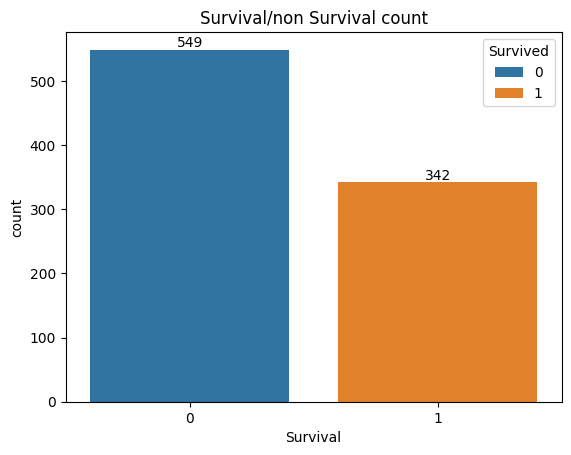

In [81]:
graph = sns.countplot(x="Survived",data=df,hue="Survived")
plt.title("Survival/non Survival count")
plt.xlabel("Survival")
plt.ylabel("count")
for container in graph.containers:
    graph.bar_label(container)

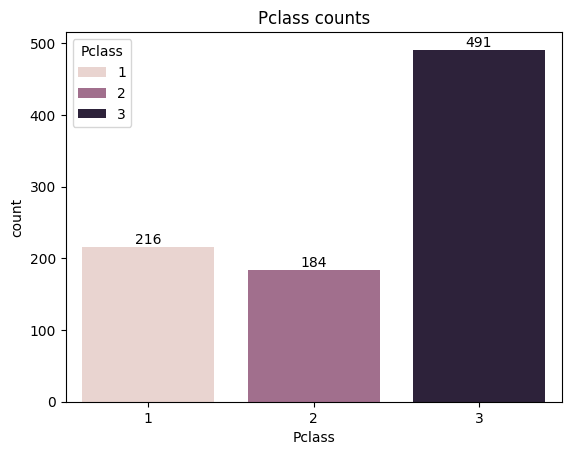

In [82]:
graph=sns.countplot(x="Pclass",data=df,hue="Pclass")
plt.title("Pclass counts")
plt.xlabel("Pclass")
plt.ylabel("count")

for container in graph.containers:
    graph.bar_label(container)

plt.show()

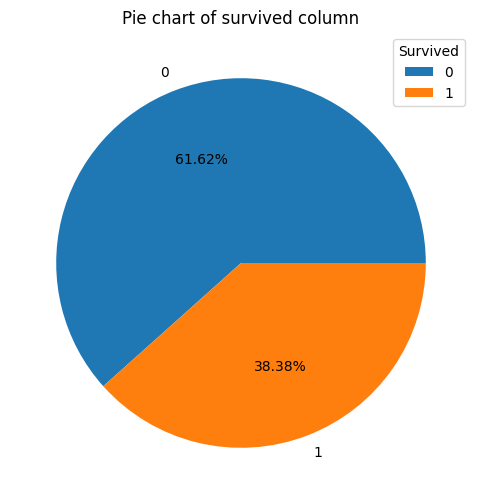

In [83]:
category_counts=df["Survived"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts,labels=category_counts.index,autopct='%.2f%%')
plt.title("Pie chart of survived column")

plt.legend(labels=category_counts.index,title="Survived",loc="upper right")
plt.show()

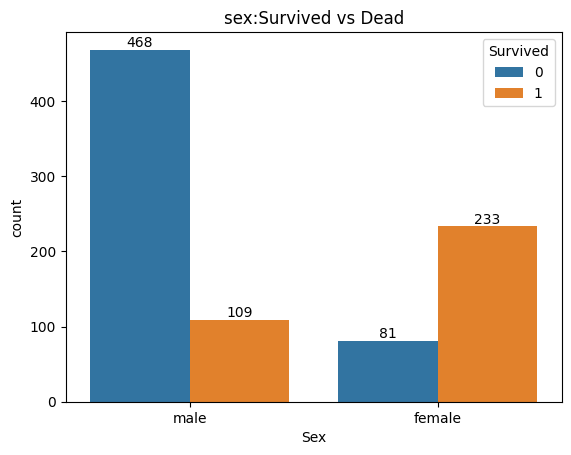

In [84]:
graph=sns.countplot(x="Sex",hue="Survived",data=df)
plt.title('sex:Survived vs Dead')
for container in graph.containers:
    graph.bar_label(container)
plt.show()

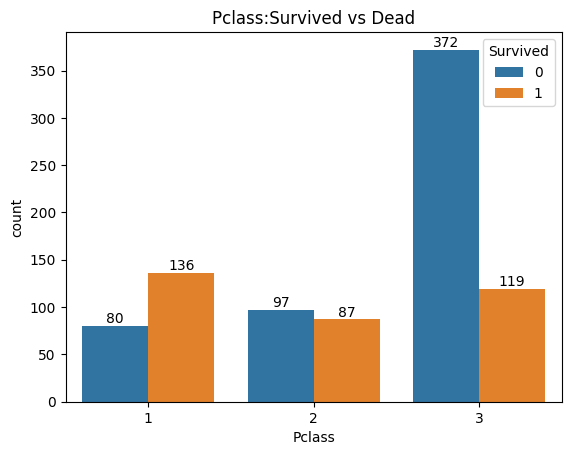

In [85]:
graph=sns.countplot(x="Pclass",hue='Survived',data=df)
plt.title('Pclass:Survived vs Dead')

for container in graph.containers:
    graph.bar_label(container)

plt.show()
    

In [86]:
df.groupby(['Pclass','Sex','Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [87]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [89]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Passenger on the ship: 29.69911764705882 Years


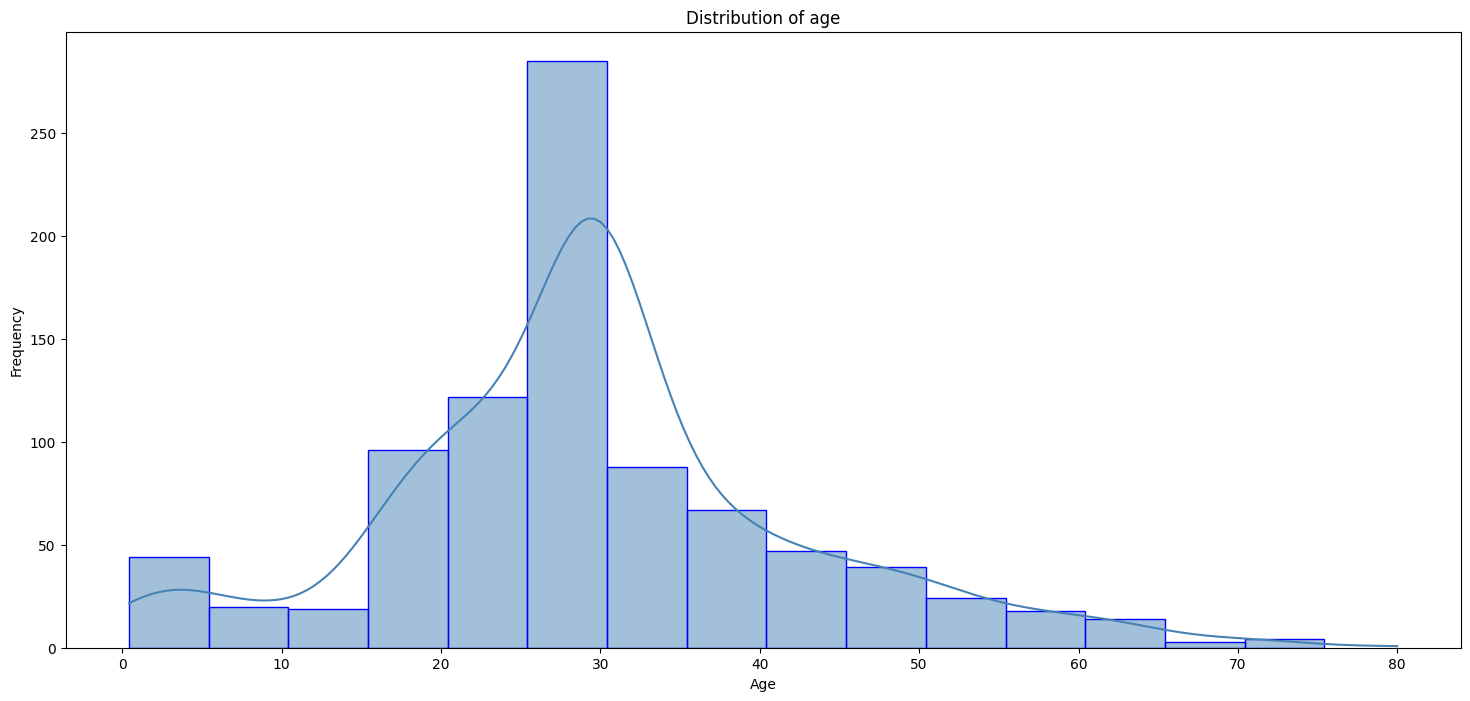

In [90]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Passenger on the ship:',df['Age'].mean(),'Years')

plt.figure(figsize=(18,8))

sns.histplot(df['Age'],bins=np.arange(df['Age'].min(),df['Age'].max(),5),color='steelblue',edgecolor='blue',kde=True)

plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [91]:
df['Sex']=df['Sex'].map({"male":int(0),"female":int(1)})
df=df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]]

corr=df.corr()


<Axes: >

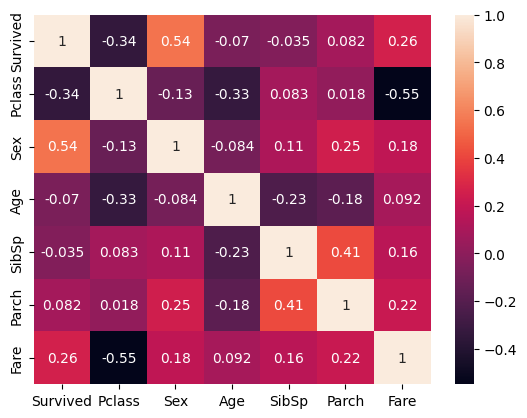

In [92]:
sns.heatmap(corr,annot=True)

In [94]:
df.shape

(891, 7)

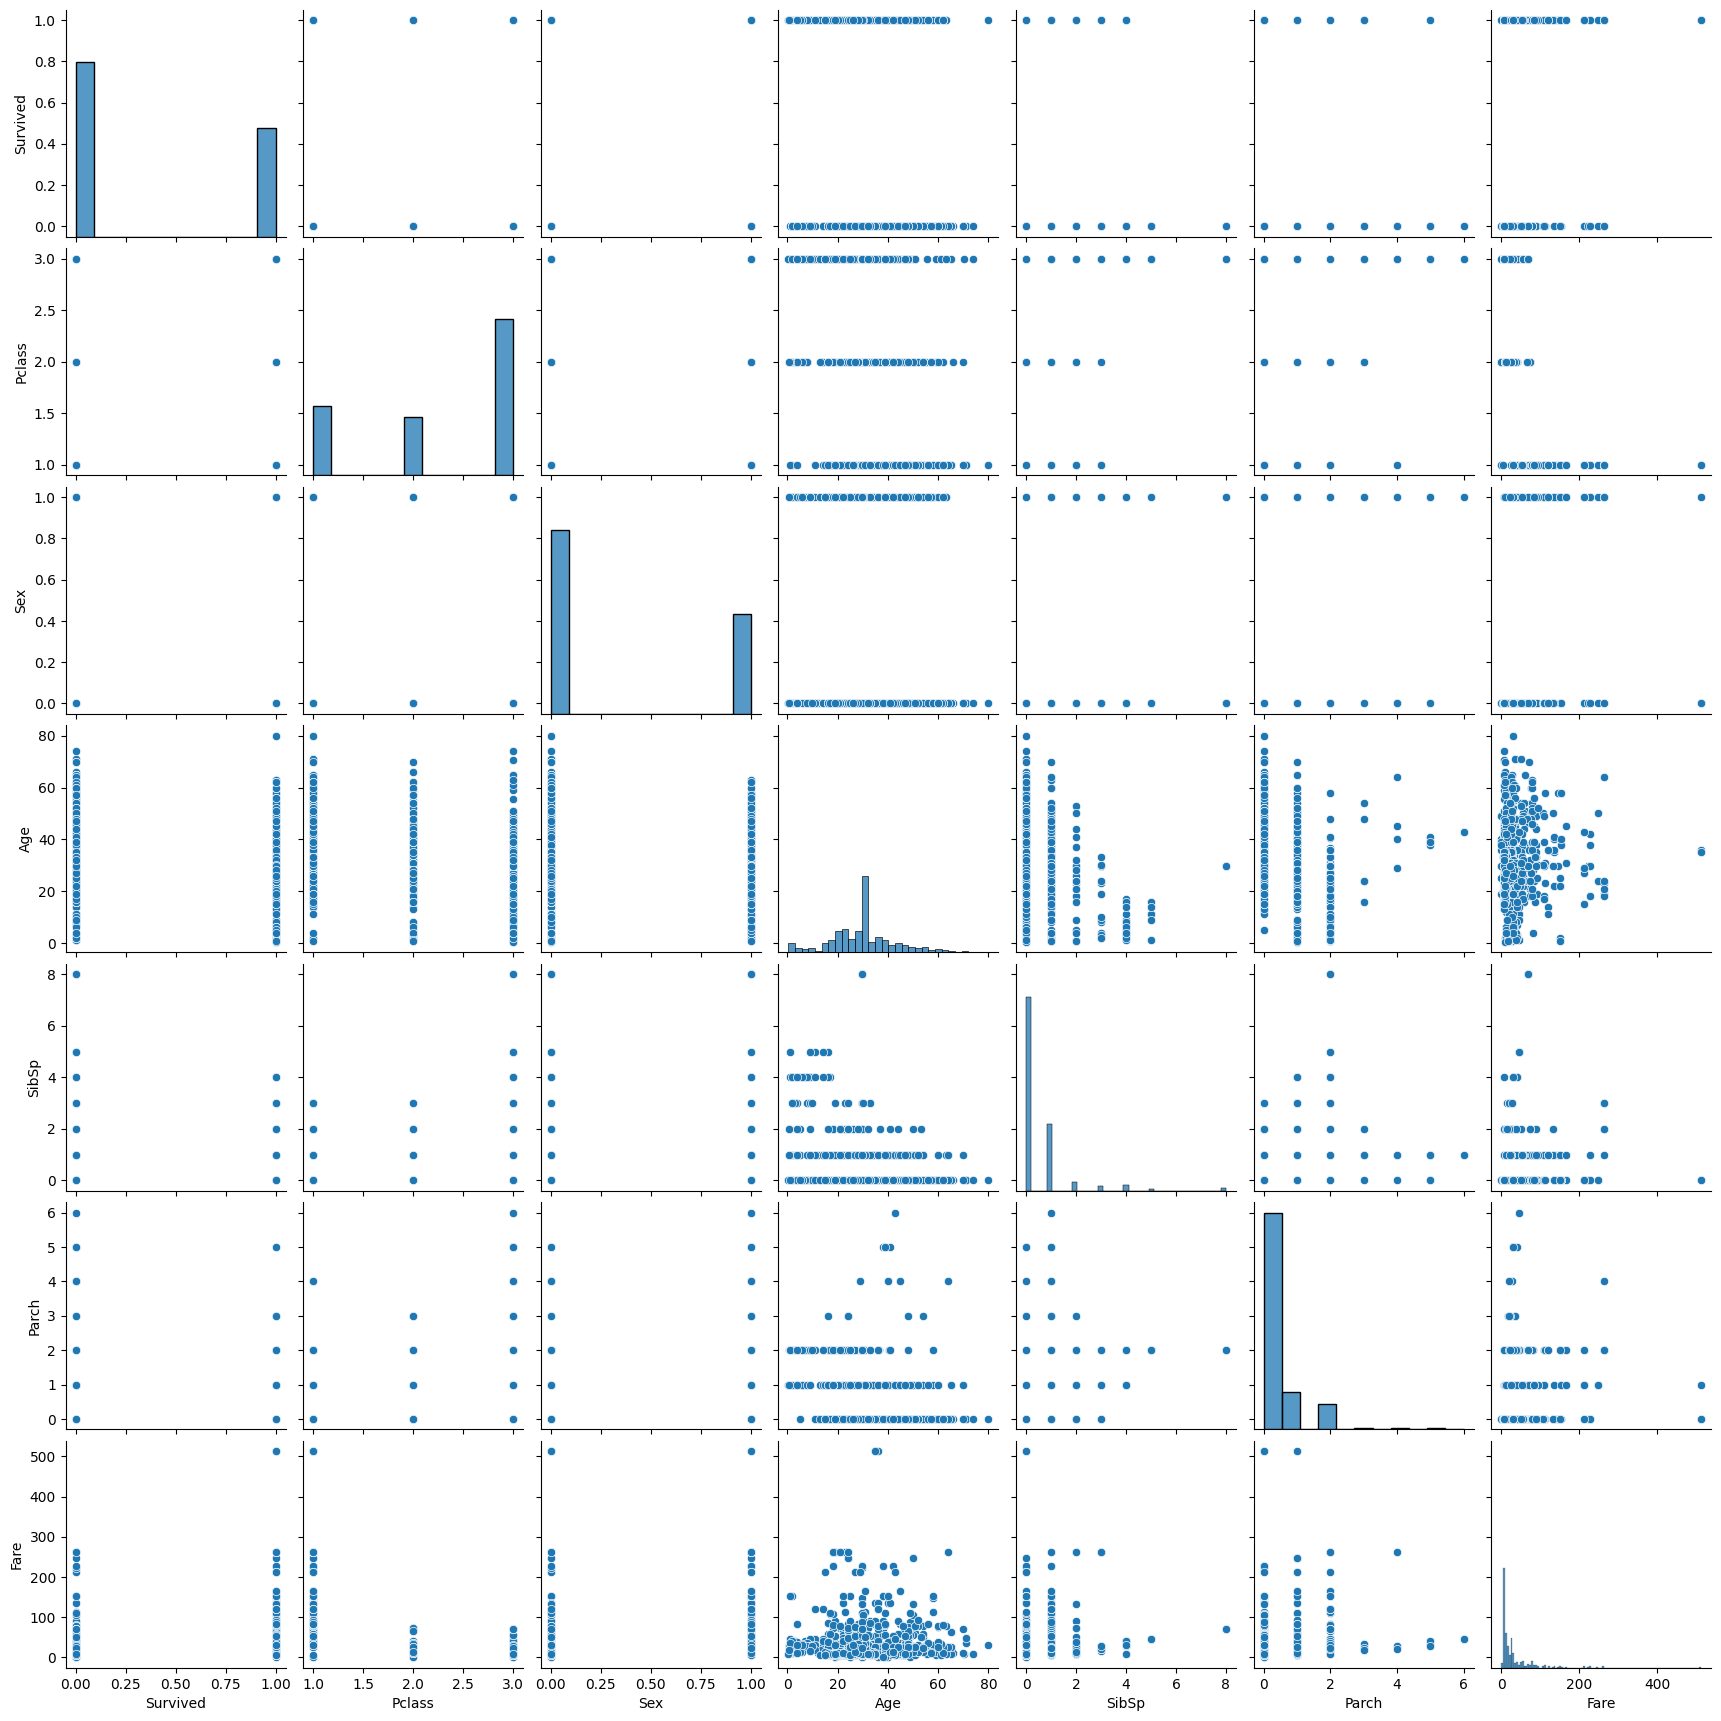

In [93]:
sns.pairplot(df)